## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#1). Load the datasets.
# Load the Excel files
balance_sheet = pd.read_excel('data/Balance_Sheet.xlsx')
income_statement = pd.read_excel('data/Income_Statement.xlsx')

#2.) Inspect the data
print(balance_sheet.info())
print(income_statement.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [5]:

# Show specific columns
print(balance_sheet[['company', 'comp_type', 'Year', 'Total Liab' ]])

   company comp_type  Year    Total Liab
0     AAPL      tech  2019  248028000000
1     AAPL      tech  2020  258549000000
2     AAPL      tech  2021  287912000000
3     AAPL      tech  2022  302083000000
4     MSFT      tech  2019  184226000000
5     MSFT      tech  2020  183007000000
6     MSFT      tech  2021  191791000000
7     MSFT      tech  2022  198298000000
8     GOOG      tech  2018   55164000000
9     GOOG      tech  2019   74467000000
10    GOOG      tech  2020   97072000000
11    GOOG      tech  2021  107633000000
12    AMZN      tech  2018  119099000000
13    AMZN      tech  2019  163188000000
14    AMZN      tech  2020  227791000000
15    AMZN      tech  2021  282304000000
16    META      tech  2018   13207000000
17    META      tech  2019   32322000000
18    META      tech  2020   31026000000
19    META      tech  2021   41108000000
20     BAM  real_est  2018  159131000000
21     BAM  real_est  2019  207123000000
22     BAM  real_est  2020  221054000000
23     BAM  real

In [6]:
#we have two datasets (balance_sheet and income_statement) that contain different but related information about companies. To compute the leverage ratio and profitability ratio, we need information from both datasets:

# Leverage Ratio: Requires Total Liabilities and Total Stockholder Equity (from balance_sheet).
#Profitability Ratio: Requires Total Revenue and Total Operating Expenses (from income_statement).
#Since these datasets share common keys—company, comp_type, and Year—merging them combines all the relevant data into a single DataFrame (df_merged). This makes it easier to perform calculations and analyze the data.

df_ratios = pd.merge(balance_sheet, income_statement, on=['company', 'comp_type', 'Year'])
print(df_ratios.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0_x               60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
 

In [7]:
#Once df_merged is now created, calculate the required ratios. 
#Use the formulas below and to add new columns in df_merged

#Formula: 
#Leverage Ratio = Total Liabilities/Total Stockholder Equity
#Profit = TotalRevenue − TotalOperatingExpenses
#Profitability Ratio = Profit/Total Revenue

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

df_ratios['leverage_ratio'] = df_ratios['Total Liab'] / df_ratios['Total Stockholder Equity']

print(df_ratios.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0_x               60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
 

In [8]:
#You can now analyze the ratios to answer the project’s questions:
#Find the Lowest Profitability Ratio
#Task: Identify which company type (comp_type) has the lowest profitability ratio.
#This helps the hedge fund manager understand which industry struggles the most with profitability.
# a) Which company type has the lowest profitability ratio?

lowest_profitability = df_ratios.groupby('comp_type')['profitability_ratio'].mean().idxmin()
print(f"Company type with lowest profitability: {lowest_profitability}")


Company type with lowest profitability: fmcg


In [9]:
# b) Which company type has the highest leverage ratio?

highest_leverage = df_ratios.groupby('comp_type')['leverage_ratio'].mean().idxmax()
print(f"Company type with highest leverage: {highest_leverage}")


#Note: groupby('comp_type'): Groups the data by company type so we can analyze each category (e.g., tech, fmcg, real_est) separately.
#mean(): Calculates the average profitability ratio for each company type.
#idxmin(): Finds the company type with the smallest mean profitability ratio.
#Key Insight:
#The company type with the lowest average profitability ratio likely faces challenges in managing costs or generating sufficient revenue.

Company type with highest leverage: real_est


In [10]:
# Use pivot table to calculate the average profitability ratio per company type
pivot_profitability = df_ratios.pivot_table(index="comp_type", values="profitability_ratio")
print(pivot_profitability)

# Find the company type with the lowest profitability ratio
lowest_profitability = pivot_profitability["profitability_ratio"].idxmin()
print(f"The company type with the lowest profitability ratio is: {lowest_profitability}")

# Use pivot table to calculate the average leverage ratio per company type
pivot_leverage = df_ratios.pivot_table(index="comp_type", values="leverage_ratio")
print(pivot_leverage)

# Find the company type with the highest leverage ratio
highest_leverage = pivot_leverage["leverage_ratio"].idxmax()
print(f"The company type with the highest leverage ratio is: {highest_leverage}")
print('The company type with the highest leverage ratio is: ' + str(highest_leverage))

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
The company type with the lowest profitability ratio is: fmcg
           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448
The company type with the highest leverage ratio is: real_est
The company type with the highest leverage ratio is: real_est


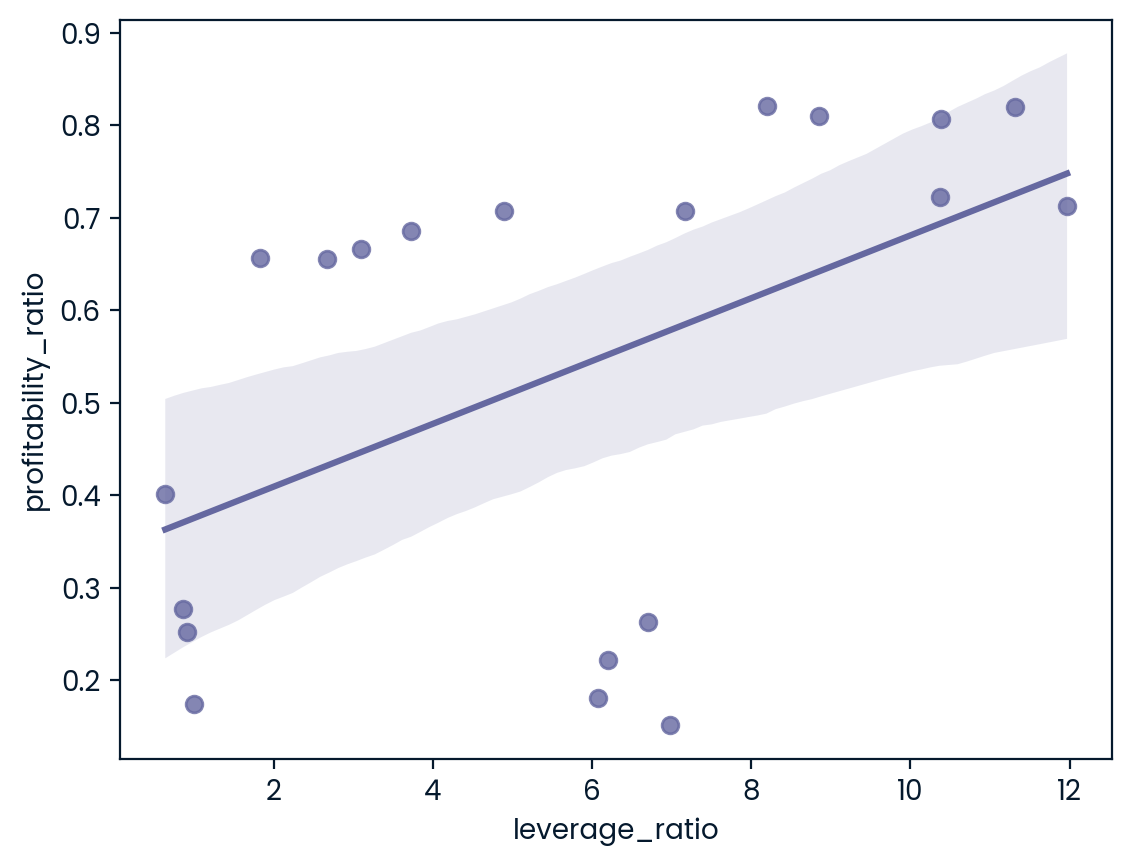

In [12]:
# Filter data for real estate companies
df_real_est = df_ratios[df_ratios["comp_type"] == "real_est"]

plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"

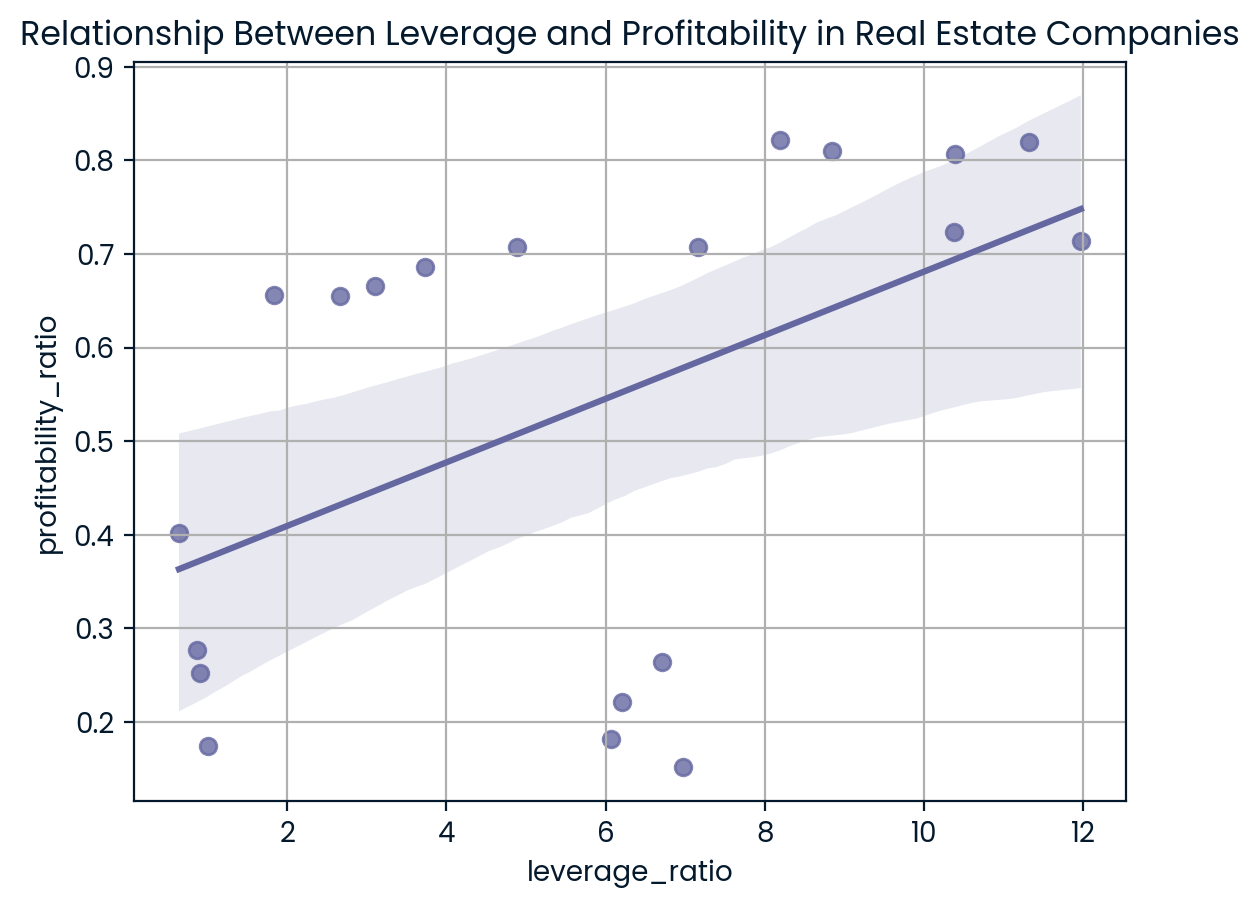

Relationship between leverage and profitability in real estate companies: positive


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_real_est = df_ratios.loc[df_ratios["comp_type"] == "real_est"]
sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")

# Add labels and title for clarity
plt.title("Relationship Between Leverage and Profitability in Real Estate Companies")
plt.grid(True)
plt.show()

# Determine the relationship
correlation = df_real_est["leverage_ratio"].corr(df_real_est["profitability_ratio"])
if correlation > 0:
    relationship = "positive"
elif correlation < 0:
    relationship = "negative"
else:
    relationship = "no relationship"
    
print("Relationship between leverage and profitability in real estate companies:", relationship)
